In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

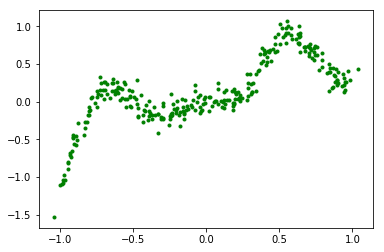

In [3]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [161]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(1, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.2982268203547467

_______________________
epoch 100
Loss 0.06153089398290706

_______________________
epoch 200
Loss 0.052703774937406835

_______________________
epoch 300
Loss 0.048165110551660346

_______________________
epoch 400
Loss 0.04699809597558174

_______________________
epoch 500
Loss 0.04692447332649719

_______________________
epoch 600
Loss 0.04692438525524131

_______________________
epoch 700
Loss 0.04692438813300527

_______________________
epoch 800
Loss 0.04692438266445964

_______________________
epoch 900
Loss 0.046924394174798136

_______________________
epoch 1000
Loss 0.04692438499669971

_______________________
epoch 1100
Loss 0.0469243927952202

_______________________
epoch 1200
Loss 0.04692439136277965

_______________________
epoch 1300
Loss 0.046924383908234175

_______________________
epoch 1400
Loss 0.04692439142713959

_______________________
epoch 1500
Loss 0.04692439212653097

_______________________
epoch 1600

TclError: invalid command name "pyimage613"

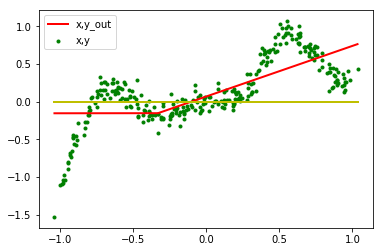

In [162]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    
    y_out = net.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
        plt.plot(x, np.zeros_like(x), c='y', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

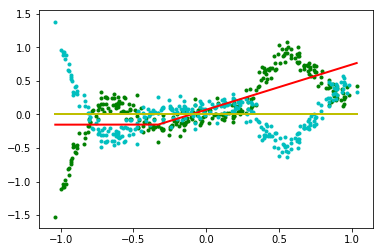

In [163]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(x, dy, marker='.', color='c', label='x,dy')

plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

In [164]:
outs = []
for i in range(n_hidden):
    out = layer1.output[:, i]*layer2.weights[i]
    outs.append(out)

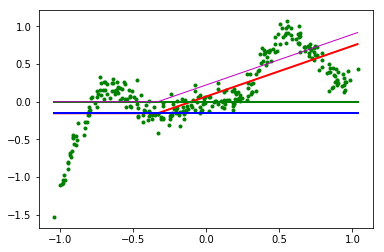

In [165]:
plt.scatter(x, y, marker='.', color='g', label='x,y0')
plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='g', lw=2)
plt.plot(x, np.zeros_like(x)+layer2.bias, c='b', lw=2)

for i, out in enumerate(outs):
    plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')

### Adding new neurons at some point with zero output 

In [176]:
from copy import deepcopy

In [177]:
layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

In [186]:
w1 = np.hstack([layer1.weights, np.array([[1]])])
w1

array([[0.63486367, 1.        ]])

In [187]:
## the boundary of the relu at zero y=wx+b,--> b=-wx
-(-1)*(0.5)

0.5

In [188]:
b1 = np.hstack([layer1.bias, np.array([0.5])])
b1

array([0.21036719, 0.5       ])

In [189]:
w2 = np.vstack([layer2.weights, np.array([[0]])])
w2

array([[1.05771024],
       [0.        ]])

In [190]:
b2 = deepcopy(layer2.bias)
b2

array([-0.153453])

In [191]:
## creating new network with added neuron
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.NonLinearLayer(1, n_hidden+1, activation=tnn.Relu(),
                             weights=w1, bias=b1,
                             optimizer=optimizer)
layer2_ = tnn.LinearLayer(n_hidden+1, 1,
                          weights=w2, bias=b2,
                          optimizer=optimizer)

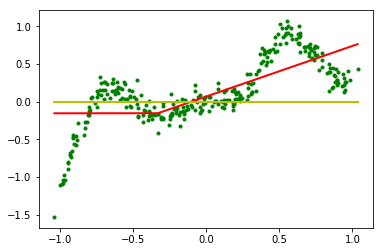

In [192]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
y_out = net_.forward(xx)
plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

_______________________
epoch 0
Loss 0.04692478811766539

_______________________
epoch 10
Loss 0.04692749266790569

_______________________
epoch 20
Loss 0.04693006997823719

_______________________
epoch 30
Loss 0.0469286898835152

_______________________
epoch 40
Loss 0.04692669125575543

_______________________
epoch 50
Loss 0.04692168190233466

_______________________
epoch 60
Loss 0.04689738263040916

_______________________
epoch 70
Loss 0.04635601033809433

_______________________
epoch 80
Loss 0.045199818389698006

_______________________
epoch 90
Loss 0.04379009677135979

_______________________
epoch 100
Loss 0.04284816539614459

_______________________
epoch 110
Loss 0.042419160074391

_______________________
epoch 120
Loss 0.04230219428340087

_______________________
epoch 130
Loss 0.0422797147024862

_______________________
epoch 140
Loss 0.04227858957992663

_______________________
epoch 150
Loss 0.04227937895476367

_______________________
epoch 160
Loss 0.0422785549952

TclError: invalid command name "pyimage675"

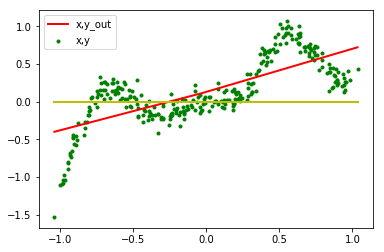

In [193]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    
    y_out = net_.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net_.backward(dy)
    
    net_.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
        plt.plot(x, np.zeros_like(x), c='y', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

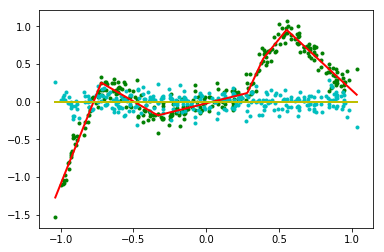

In [158]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(x, dy, marker='.', color='c', label='x,dy')

plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

In [146]:
outs = []
for i in range(n_hidden+1):
    out = layer1_.output[:, i]*layer2_.weights[i]
    outs.append(out)

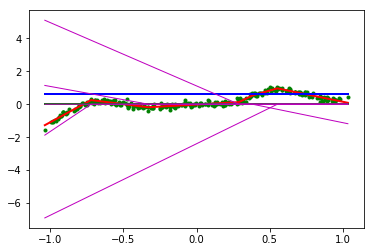

In [147]:
plt.scatter(x, y, marker='.', color='g', label='x,y0')
plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='g', lw=2)
plt.plot(x, np.zeros_like(x)+layer2.bias, c='b', lw=2)

for i, out in enumerate(outs):
    plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')